In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.datasets import make_circles, make_moons

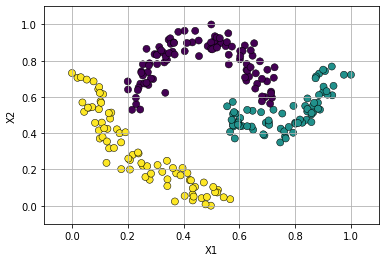

In [27]:
np.random.seed(249) ## 148, 249

xxc, yc = make_circles(n_samples=600, factor=.5,
                                      noise=.09)
idx = yc==0
xxc = xxc[idx]
yc = yc[idx]

idx = (xxc[:,0]+xxc[:,1]<-1)
xxc = xxc[idx]
yc = yc[idx]


xxm, ym = make_moons(n_samples=200, noise=.15)
xxm = xxm/2 - 0.2

msk0 = np.bitwise_and(ym==1 ,xxm[:, 0] > 0)
msk1 = ym==0
msk = msk0 | msk1
xxm = xxm[msk]
ym = ym[msk]

xx = np.concatenate((xxm, xxc), axis=0)
y = np.concatenate((ym, yc+2), axis=0)

## MinMax Normalization
x1 = xx[:,0]
x2 = xx[:,1]
x1 = (x1-x1.min())/(x1.max()-x1.min())
x2 = (x2-x2.min())/(x2.max()-x2.min())
xx = np.column_stack((x1,x2))

%matplotlib inline
plt.scatter(x1, x2, c=y, s=50, edgecolors='k', lw=0.5)

(x1min, x1max) = -0.1, 1.1
plt.xlim((x1min, x1max))
plt.ylim((x1min, x1max))
plt.xlabel("X1")
plt.ylabel('X2')
plt.grid()

## Clustering

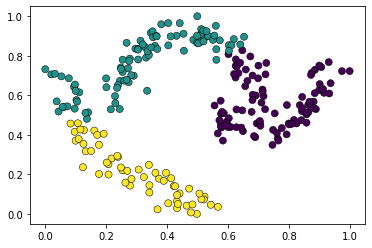

In [31]:
gmm = GaussianMixture(n_components=3)
gmmc = gmm.fit_predict(xx)

plt.scatter(x1, x2, c=gmmc, s=50, edgecolors='k', lw=0.5)

In [92]:
def plot_results(X, Y_, means, covariances, alpha=0.2, covar_scale = [0.5, 1, 2] ):
    ax = plt.subplot(1, 1, 1)
    for i, (mean, covar) in enumerate(zip(
            means, covariances)):
        v, w = np.linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / np.linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        sctp = plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], marker='.')

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        c = sctp.get_facecolor()[0]
    
        for scale in covar_scale:
            ell = matplotlib.patches.Ellipse(mean, v[0]*scale, v[1]*scale, 180. + angle, color=c)
            ell.set_clip_box(ax.bbox)
            ell.set_alpha(alpha/scale)
            ax.add_artist(ell)

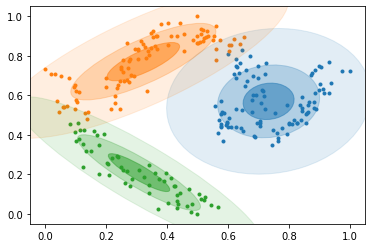

In [96]:
plot_results(xx, gmmc, gmm.means_, gmm.covariances_, alpha=0.25)

## GMM with gradient descent ?!